# Penguins!

## Data Preparation

### Import

In [2]:
from palmerpenguins import load_penguins
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

### Data

In [4]:
penguins = load_penguins()
df = pd.DataFrame(penguins)
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [3]:
df['species'].unique() # 3 classes

array(['Adelie', 'Gentoo', 'Chinstrap'], dtype=object)

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
year                   int64
dtype: object

In [5]:
df.isnull().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
year                  0
dtype: int64

### Clustering --- With Label Removed

* a lustering funciton f
* input: pairwaise distance between points in S
* output: a partition of S

In [66]:
px = df[['flipper_length_mm', 'body_mass_g']]
px_imputer  = SimpleImputer(strategy='median')
px = px_imputer.fit_transform(px)

/var/folders/zr/5gt0j9qx40115l912wkkz6g00000gn/T/ipykernel_20632/4157541860.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


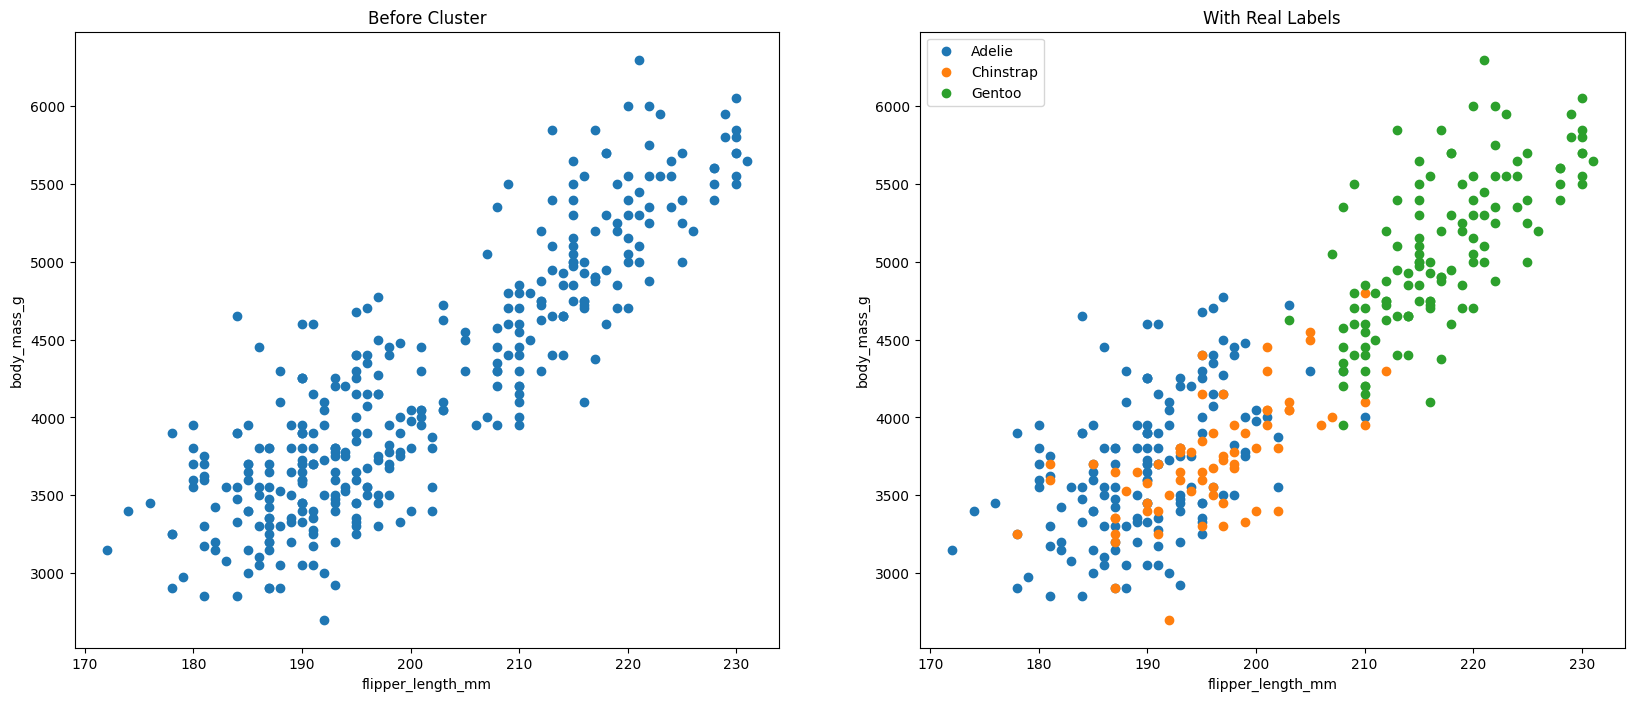

In [83]:
plt.subplots(figsize=(20,8))

# without label
plt.subplot(1, 2, 1)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.title('Before Cluster')

plt.subplot(1, 2, 2)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')

labels = df['species'].unique().tolist()
for label, group in df.groupby('species'):
    plt.scatter(group['flipper_length_mm'], group['body_mass_g'], label=label)

plt.legend()
plt.title('With Real Labels')
plt.show()

In [57]:
from sklearn.metrics import silhouette_score
k_num = [2, 3, 4, 5, 6]
silhouette_scores = []
for i in range(len(k_num)):
    kmean_model = KMeans(n_clusters = k_num[i]).fit(px)
    silhouette_scores.append(silhouette_score(px, kmean_model.labels_))

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.1

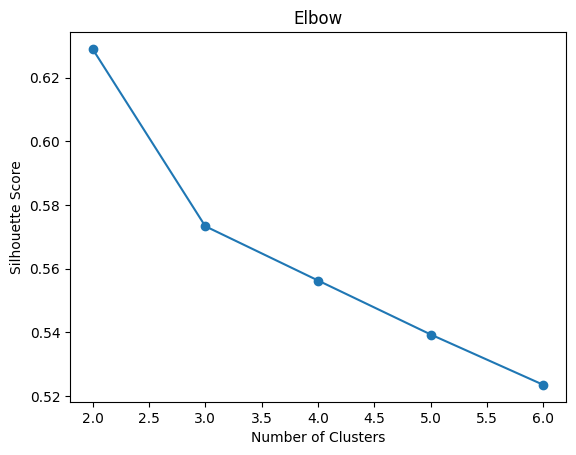

In [62]:
# we can see than k = 3 is optimal which is the original grouping of penguins
plt.plot(k_num, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Elbow')
plt.show()

In [102]:
# kmeans w/ k = 3
k = 3
kmeans = KMeans(n_clusters = k)
k3_label = kmeans.fit_predict(px)

k3_df = pd.DataFrame({'species':k3_label,
                      'flipper_length_mm': px[:,0],
                      'body_mass_g': px[:,1]})

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


/var/folders/zr/5gt0j9qx40115l912wkkz6g00000gn/T/ipykernel_20632/3987390476.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 3, 1)


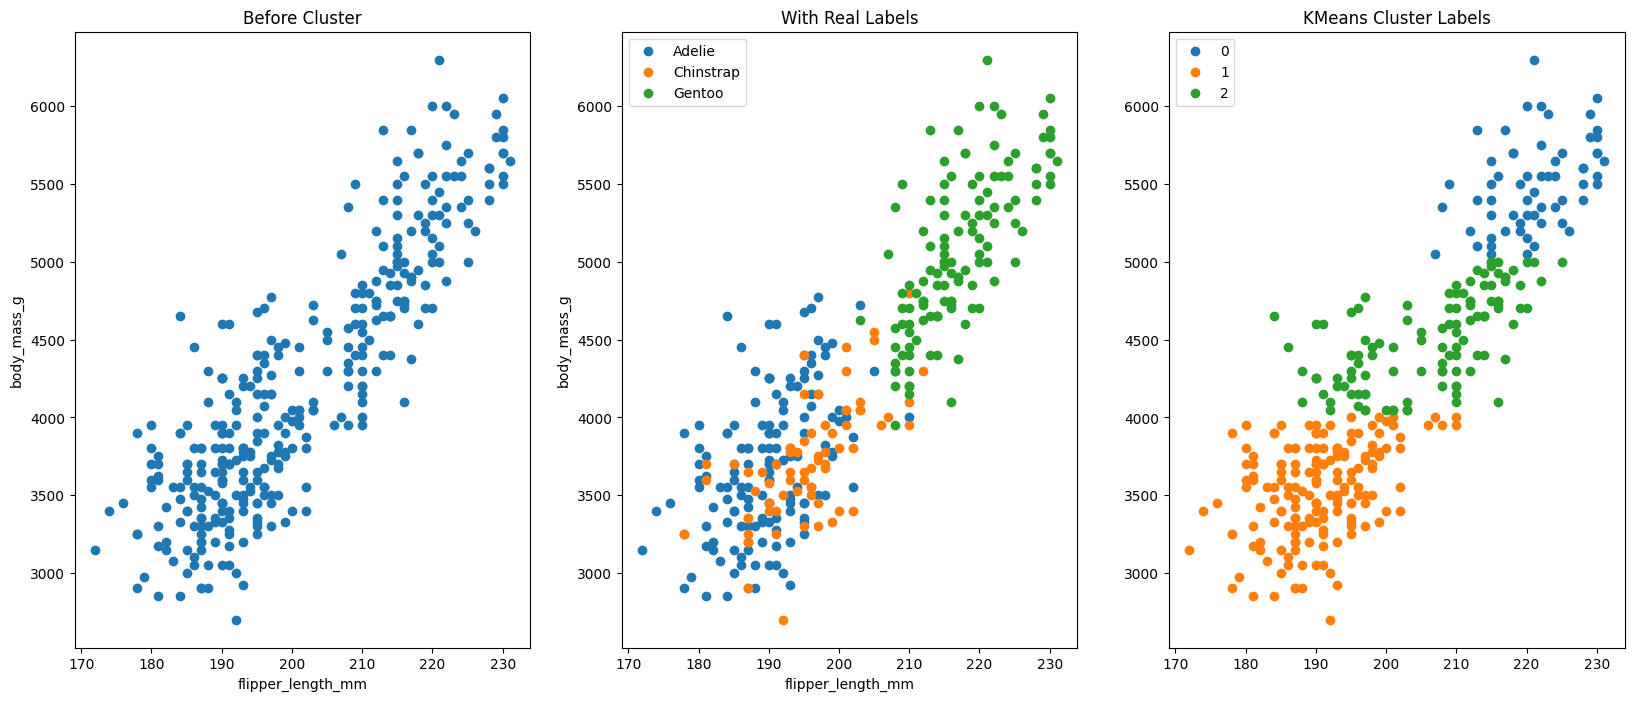

In [109]:
plt.subplots(figsize=(20,8))

# without label
plt.subplot(1, 3, 1)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.title('Before Cluster')

plt.subplot(1, 3, 2)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')

for label, group in df.groupby('species'):
    plt.scatter(group['flipper_length_mm'], group['body_mass_g'], label=label)
plt.legend()
plt.title('With Real Labels')

plt.subplot(1, 3, 3)
k3_labels = df['species'].unique().tolist()
for label, group in k3_df.groupby('species'):
    plt.scatter(group['flipper_length_mm'], group['body_mass_g'], label=label)
plt.legend()
plt.title('KMeans Cluster Labels')

plt.show()

### Pipeline

In [39]:
X = df[df.columns.to_list()[1:]]
y = df['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
cat_cols = df[df.columns.to_list()[1:]].select_dtypes(include=['object']).columns

In [41]:
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(sparse=False, drop='first'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, num_cols),
        ('cat', cat_transformer, cat_cols)
    ]
)

In [43]:
preprocessor.fit_transform(X_train)
preprocessor.fit(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g',
       'year'],
      dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehot',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 Index(['island', 'sex'], dtype='object'))])

## Visualization

In [59]:
import numpy as np
import altair as alt

In [65]:
x_axis_limits = [30, 65]  # Set your desired limits for the x-axis
y_axis_limits = [150, 250]  # Set your desired limits for the y-axis

# Create the Altair chart with specified axis limits
billflipper = alt.Chart(penguins).mark_circle(size=60).encode(
    x=alt.X('bill_length_mm', scale=alt.Scale(domain=x_axis_limits)),
    y=alt.Y('flipper_length_mm', scale=alt.Scale(domain=y_axis_limits)),
    color='species',
    tooltip=['species', 'island', 'sex']
).interactive()
billflipper

alt.Chart(...)

In [66]:
myJekyllDir = '/Users/wjt/Desktop/github/lwangjt.github.io/assets/json/'
billflipper.save(myJekyllDir + 'billflipper.json')

In [67]:
flipbody = alt.Chart(df).mark_area(opacity=0.3).encode(
    x="flipper_length_mm:Q",
    y=alt.Y("body_mass_g:Q").stack(None),
    color="species"
)

flipbody

alt.Chart(...)

In [68]:
myJekyllDir = '/Users/wjt/Desktop/github/lwangjt.github.io/assets/json/'
flipbody.save(myJekyllDir + 'flipbody.json')

In [69]:
df_sex = df[df['sex'].isnull() == False]

In [70]:
bodyspecies = alt.Chart(df_sex).mark_bar().encode(
    x='body_mass_g:Q',
    y='sex',
    color='sex',
    row = 'species'
)
bodyspecies

alt.Chart(...)

In [71]:
myJekyllDir = '/Users/wjt/Desktop/github/lwangjt.github.io/assets/json/'
bodyspecies.save(myJekyllDir + 'bodyspecies.json')


In [73]:
brush = alt.selection_interval()

points = alt.Chart(df).mark_point().encode(
    x= alt.X('flipper_length_mm:Q',scale=alt.Scale(domain=[130, 250])),
    y= alt.Y('body_mass_g:Q', scale=alt.Scale(domain=[2000, 7000])),
    color=alt.condition(brush, 'species:N', alt.value('lightgray'))
).add_params(
    brush
)

bars = alt.Chart(df).mark_bar().encode(
    y='species:N',
    color='species:N',
    x='count(species):Q'
).transform_filter(
    brush
)

points & bars

alt.VConcatChart(...)

In [74]:
combined_penguin = points & bars
myJekyllDir = '/Users/wjt/Desktop/github/lwangjt.github.io/assets/json/'
combined_penguin.save(myJekyllDir + 'combined_penguin.json')

## presentation-use

/var/folders/zr/5gt0j9qx40115l912wkkz6g00000gn/T/ipykernel_70913/2530349319.py:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


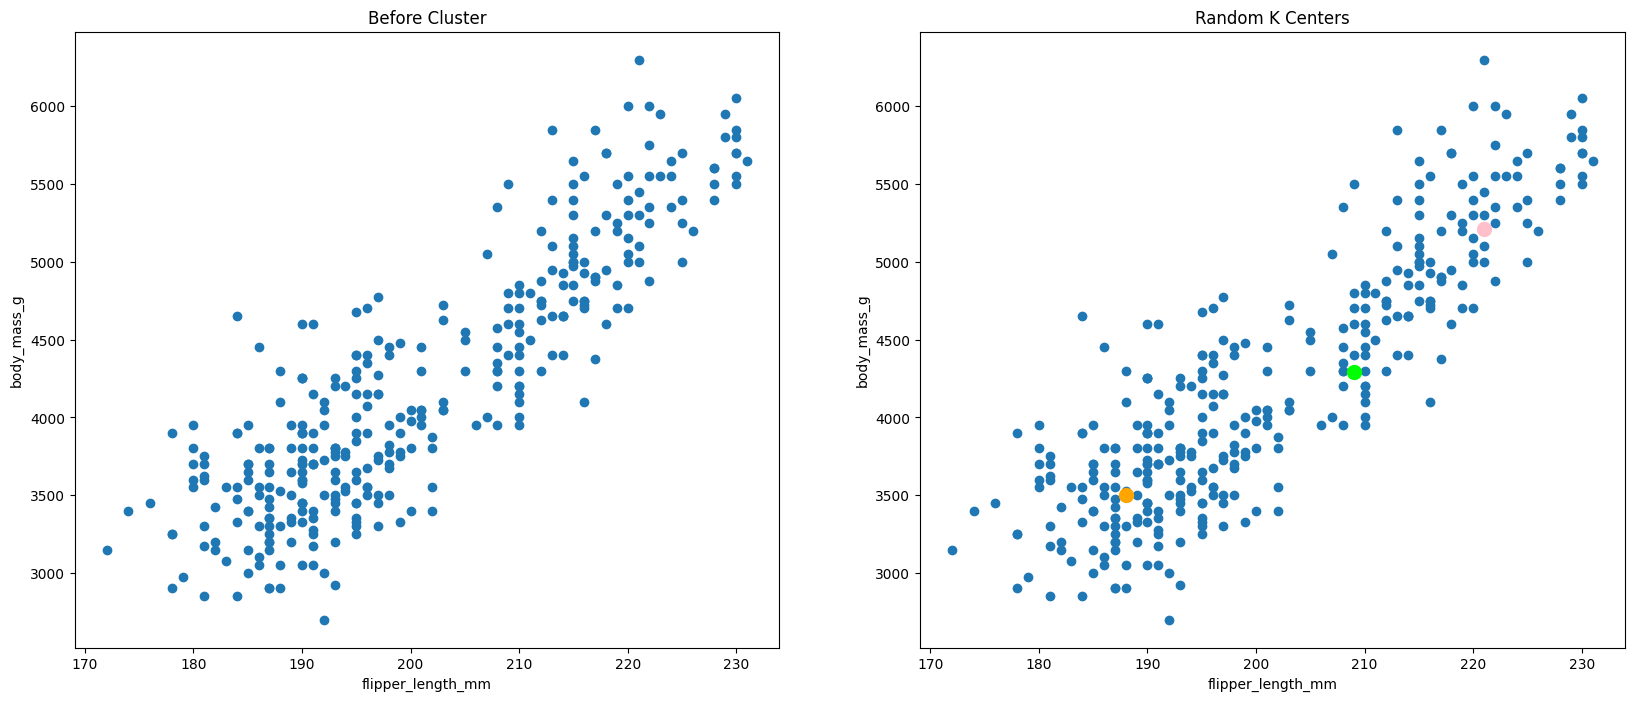

In [16]:
plt.subplots(figsize=(20,8))

# without label
plt.subplot(1, 2, 1)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.title('Before Cluster')

plt.subplot(1, 2, 2)
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.scatter(df['flipper_length_mm'], df['body_mass_g'])
plt.plot(188, 3500, marker = 'o', markersize = 10, color = 'orange')
plt.plot(209, 4290, marker = 'o', markersize = 10, color = 'lime')
plt.plot(221, 5210, marker = 'o', markersize = 10, color = 'pink')
plt.title('Random K Centers')
plt.show()

In [37]:
filter = df[['flipper_length_mm', 'body_mass_g']]
filter = filter.dropna()

filter.shape

(342, 2)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


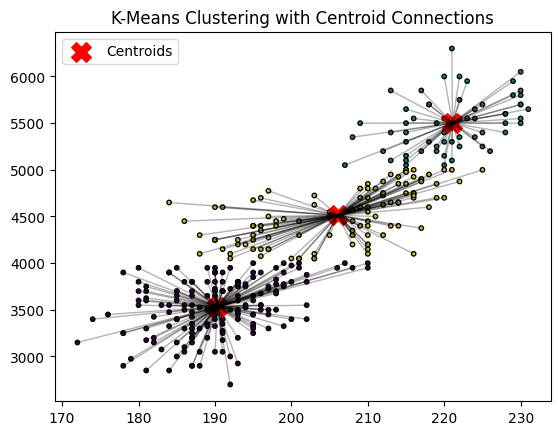

In [42]:
data = filter[['flipper_length_mm', 'body_mass_g']].values
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=10)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Connect each centroid to its assigned data points with solid lines
for i in range(len(centroids)):
    cluster_points = data[labels == i]
    for point in cluster_points:
        plt.plot([centroids[i, 0], point[0]], [centroids[i, 1], point[1]], 'k-', lw=1, alpha=0.3)

plt.title('K-Means Clustering with Centroid Connections')
plt.legend()
plt.show()


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


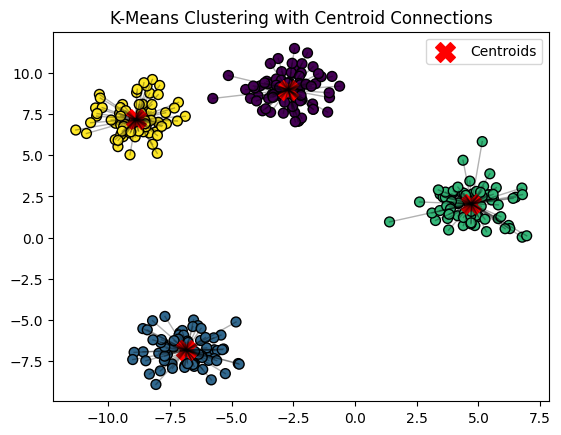

In [26]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Create synthetic data for demonstration
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Fit KMeans model
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(data)
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

# Plot the data points
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)

# Plot the centroids
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')

# Connect each centroid to its assigned data points with solid lines
for i in range(len(centroids)):
    cluster_points = data[labels == i]
    for point in cluster_points:
        plt.plot([centroids[i, 0], point[0]], [centroids[i, 1], point[1]], 'k-', lw=1, alpha=0.3)

plt.title('K-Means Clustering with Centroid Connections')
plt.legend()
plt.show()


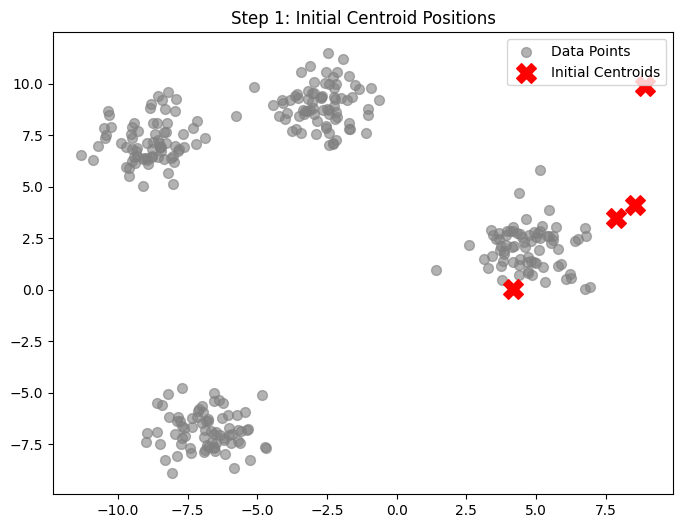

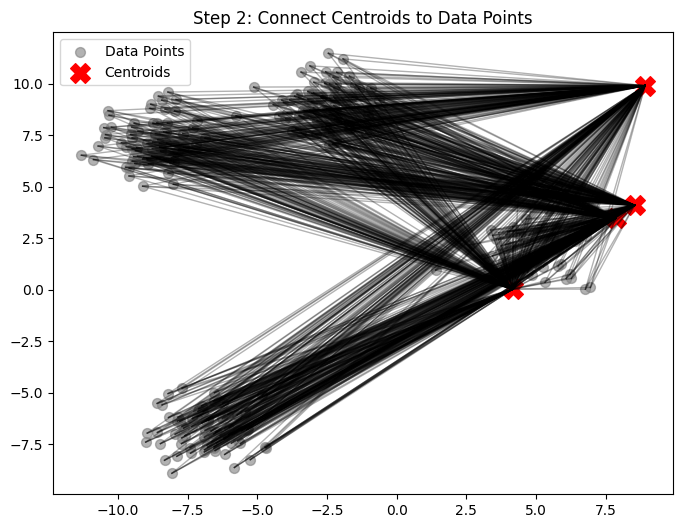

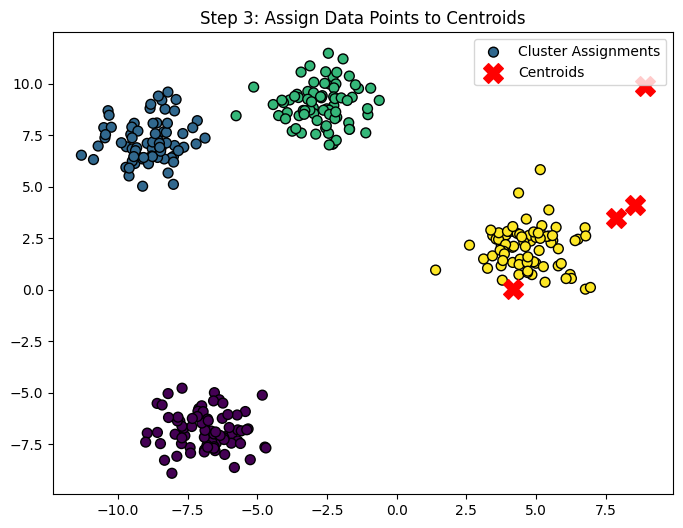

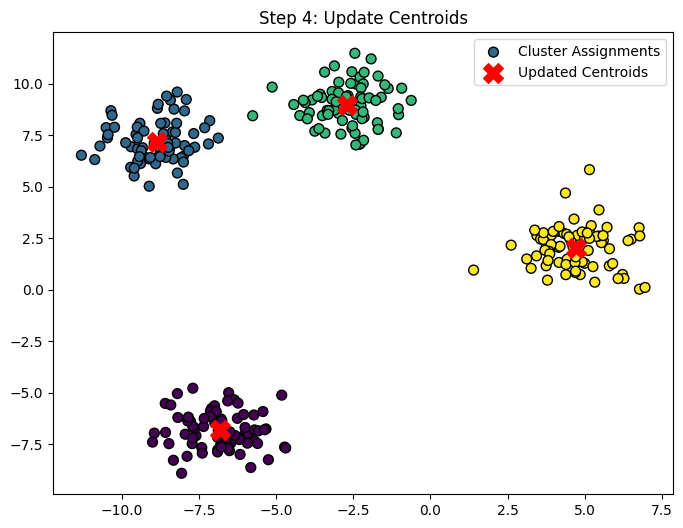

In [44]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data for demonstration
data, _ = make_blobs(n_samples=300, centers=4, random_state=42)

# Set the number of clusters (k)
k = 4

# Initialize centroids
centroids = np.random.rand(k, 2) * 10

# Plot 1: Initial Centroid Positions
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.6, s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Initial Centroids')
plt.title('Step 1: Initial Centroid Positions')
plt.legend()
plt.show()

# Plot 2: Connect Centroids to Data Points
plt.figure(figsize=(8, 6))
for i in range(len(centroids)):
    cluster_points = data
    for point in cluster_points:
        plt.plot([centroids[i, 0], point[0]], [centroids[i, 1], point[1]], 'k-', lw=1, alpha=0.3)
plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.6, s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Step 2: Connect Centroids to Data Points')
plt.legend()
plt.show()

# Plot 3: Assign Data Points to Centroids
kmeans = KMeans(n_clusters=k, init=centroids, n_init=1, random_state=42)
kmeans.fit(data)
labels = kmeans.labels_

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, label='Cluster Assignments')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
plt.title('Step 3: Assign Data Points to Centroids')
plt.legend()
plt.show()

# Plot 4: Update Centroids
centroids = kmeans.cluster_centers_

plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, label='Cluster Assignments')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Updated Centroids')
plt.title('Step 4: Update Centroids')
plt.legend()
plt.show()


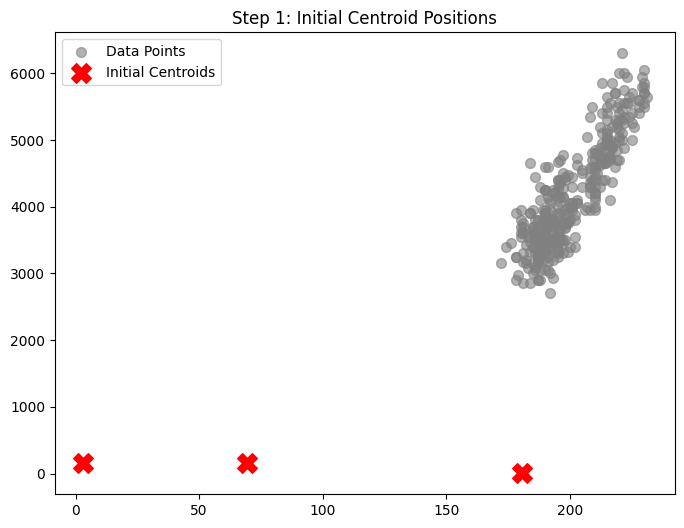

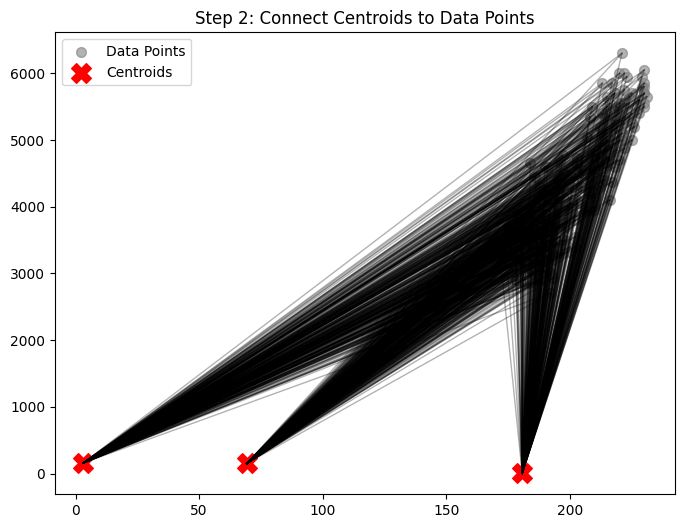

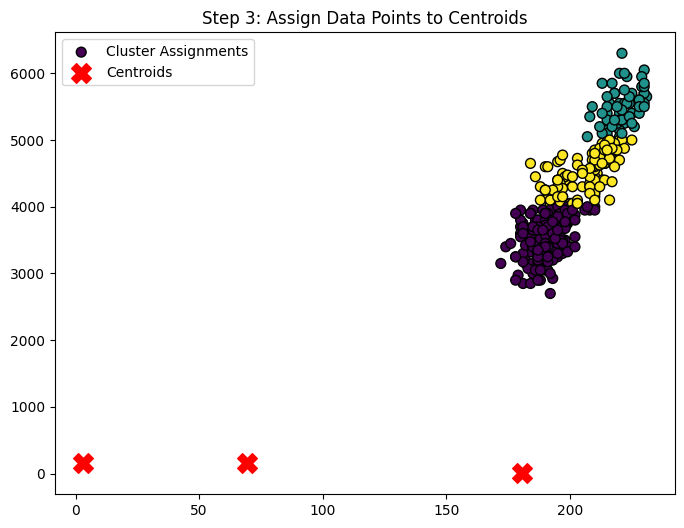

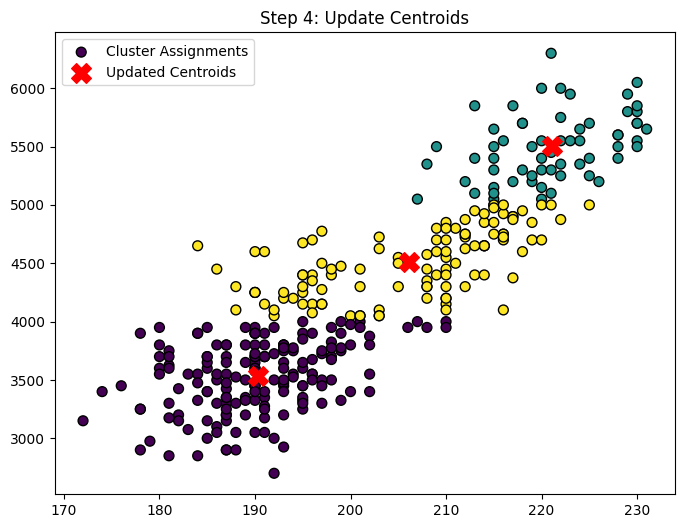

Converged after 1 iterations.


In [57]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Generate synthetic data for demonstration
#data, _ = make_blobs(n_samples=300, centers=4, random_state=42)
data = filter[['flipper_length_mm', 'body_mass_g']].values

# Set the number of clusters (k)
k = 3

# Initialize centroids
centroids = np.random.rand(k, 2)*200

# Number of iterations
max_iter = 10

# Plot 1: Initial Centroid Positions
plt.figure(figsize=(8, 6))
plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.6, s=50, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Initial Centroids')
plt.title('Step 1: Initial Centroid Positions')
plt.legend()
plt.show()

# Iterative steps
for iteration in range(max_iter):
    # Plot: Connect Centroids to Data Points
    plt.figure(figsize=(8, 6))
    for i in range(len(centroids)):
        cluster_points = data
        for point in cluster_points:
            plt.plot([centroids[i, 0], point[0]], [centroids[i, 1], point[1]], 'k-', lw=1, alpha=0.3)
    plt.scatter(data[:, 0], data[:, 1], c='gray', alpha=0.6, s=50, label='Data Points')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'Step {iteration + 2}: Connect Centroids to Data Points')
    plt.legend()
    plt.show()

    # Plot: Assign Data Points to Centroids
    kmeans = KMeans(n_clusters=k, init=centroids, n_init=1, random_state=42)
    kmeans.fit(data)
    labels = kmeans.labels_

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, label='Cluster Assignments')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Centroids')
    plt.title(f'Step {iteration + 3}: Assign Data Points to Centroids')
    plt.legend()
    plt.show()

    # Plot: Update Centroids
    centroids = kmeans.cluster_centers_

    plt.figure(figsize=(8, 6))
    plt.scatter(data[:, 0], data[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, label='Cluster Assignments')
    plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label='Updated Centroids')
    plt.title(f'Step {iteration + 4}: Update Centroids')
    plt.legend()
    plt.show()

    # Check for convergence
    if np.allclose(centroids, kmeans.cluster_centers_):
        print(f'Converged after {iteration + 1} iterations.')
        break


In [54]:
np.random.rand(3, 2)*

array([[19.36871171,  4.61821663],
       [ 6.8258634 , 23.89675466],
       [ 8.09463892, 18.34662997]])